In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

PG
Date                
2019-01-30  0.010422
2019-01-31  0.020421
2019-02-01  0.010313
2019-02-04  0.005729
2019-02-05 -0.006037

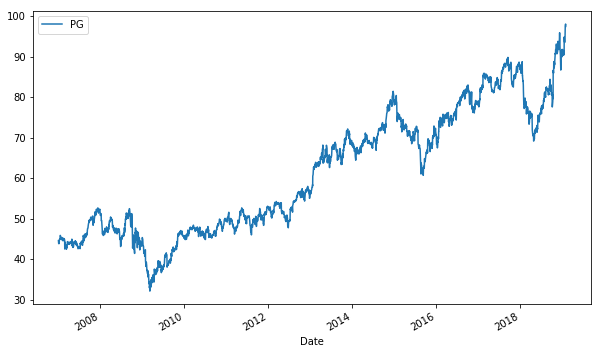

In [4]:
data.plot(figsize=(10, 6));

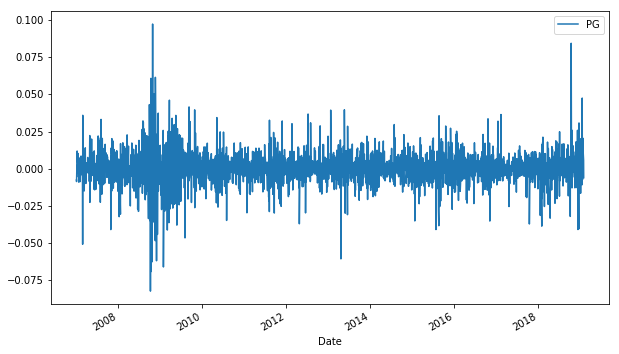

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000257
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000121
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000196
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011019
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([0.00019633])

In [13]:
drift.values

array([0.00019633])

In [14]:
stdev.values

array([0.01101926])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[0.77692092, 0.81991453],
       [0.88163925, 0.11946646],
       [0.85905118, 0.90020402],
       [0.99921322, 0.6041486 ],
       [0.01949036, 0.6738571 ],
       [0.21213084, 0.42769317],
       [0.68511221, 0.39731984],
       [0.52779291, 0.57489907],
       [0.81030156, 0.25530748],
       [0.39317763, 0.62366594]])

In [17]:
norm.ppf(x)

array([[ 0.76183555,  0.91503942],
       [ 1.18322116, -1.17765813],
       [ 1.07606624,  1.28271495],
       [ 3.16076434,  0.26410008],
       [-2.06439045,  0.45058901],
       [-0.79904954, -0.18225024],
       [ 0.48204275, -0.26029052],
       [ 0.06972294,  0.18886087],
       [ 0.8790081 , -0.65788043],
       [-0.2710465 ,  0.31512321]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.08741759,  1.51584978],
       [ 1.48225741, -0.01653493],
       [ 0.7065149 ,  1.52620713],
       [-1.89476686,  2.1598644 ],
       [-0.37201497,  1.13898501],
       [-1.09517926,  1.37758871],
       [ 2.85126599, -1.39963079],
       [ 0.84147719, -2.24223252],
       [-0.84109109, -1.57618617],
       [-1.25446909, -0.31149239]])

In [19]:
t_intervals = 1000
iterations = 10

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [20]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [21]:
daily_returns

array([[1.00304644, 0.99654224, 1.01501856, ..., 1.01294084, 1.00691201,
        0.99884097],
       [1.00422   , 0.97331216, 1.00961965, ..., 1.01426455, 1.00277362,
        0.98552233],
       [0.99833137, 1.01706215, 1.01446338, ..., 0.99040671, 1.00534923,
        1.00579497],
       ...,
       [1.00578174, 1.01578388, 1.00123422, ..., 1.00683609, 1.00145905,
        1.00596352],
       [1.00839267, 0.98493217, 0.99000048, ..., 0.98813117, 1.00765053,
        0.99808742],
       [1.02041018, 0.99324443, 0.99932552, ..., 1.01486943, 1.01155323,
        1.0110952 ]])